In [1]:
# https://github.com/ayasin/tml-assignment-2
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

path = Path('data/mushrooms')
path.mkdir()

FileExistsError: ignored

In [0]:
classes = []
classes.append("hygrophoropsis_aurantiaca")
classes.append("cantharellus_cibarius")
classes.append("paxillus_involutus")
classes.append("jack_o_lantern")

# 1. Paste into console on google image search (disable adblock):
#  urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
#  window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
# 2. Put the url lists manually as csvs into the mushrooms folder.

for i, cl in enumerate(classes):
  name = classes[i]
  csv = name + ".csv"  
  dest = path/name
  dest.mkdir(parents=True, exist_ok=True)
  download_images(path/csv, dest, max_pics=200)

In [0]:
# clean up invalid files (that can not be opened)
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

(['cantharellus_cibarius',
  'hygrophoropsis_aurantiaca',
  'jack_o_lantern',
  'paxillus_involutus'],
 4,
 628,
 156)

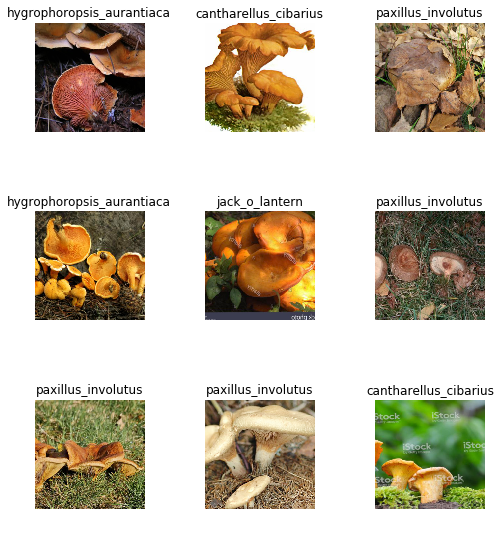

In [10]:
np.random.seed(42) # static seed for comparison
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(7,8))
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

In [11]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy])
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.378761,0.857529,0.371795,0.628205,00:13
1,0.958401,0.612450,0.237179,0.762821,00:12
2,0.745974,0.636888,0.217949,0.782051,00:12


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


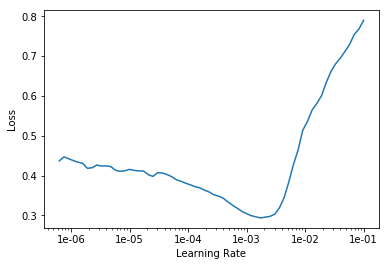

In [12]:
learn.save('stage-1')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.407347,0.626796,0.217949,0.782051,00:13
1,0.340628,0.595712,0.198718,0.801282,00:13
2,0.314230,0.575696,0.185897,0.814103,00:13
3,0.280652,0.569224,0.185897,0.814103,00:13


In [0]:
learn.save('stage-2')

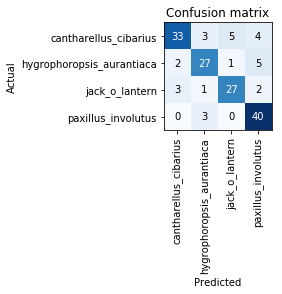

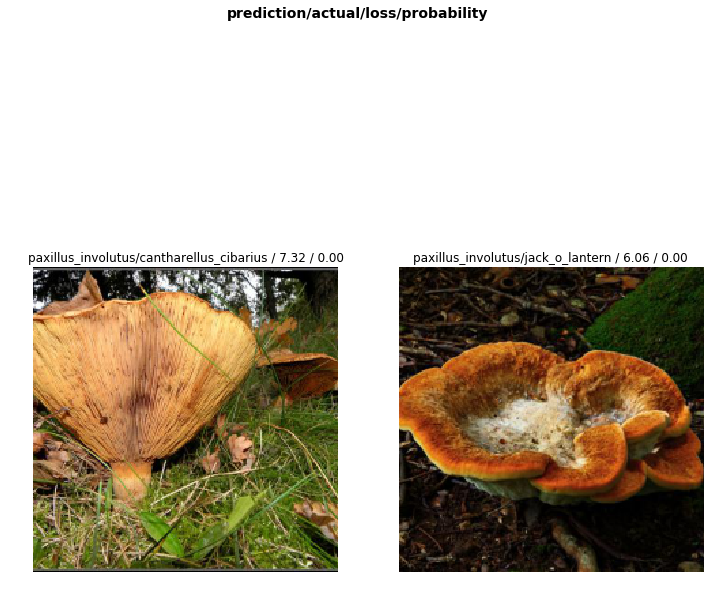

In [15]:
learn.load('stage-2');
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(2)

In [0]:
# Image cleaner can not be run in colab so we skip this for now (reference: https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-download.ipynb) 

In [0]:
learn.export() # creates export.pkl of the model